Test Accuracy: 63.41%
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       346
           1       0.48      0.41      0.44       276
           2       0.67      0.70      0.69       850
           3       0.42      0.14      0.21        72
           4       0.68      0.73      0.70       823

    accuracy                           0.63      2367
   macro avg       0.56      0.50      0.51      2367
weighted avg       0.62      0.63      0.63      2367

Confusion Matrix:
[[179  21  79   7  60]
 [ 33 112  61   2  68]
 [ 62  38 599   5 146]
 [ 23  17   9  10  13]
 [ 33  46 143   0 601]]


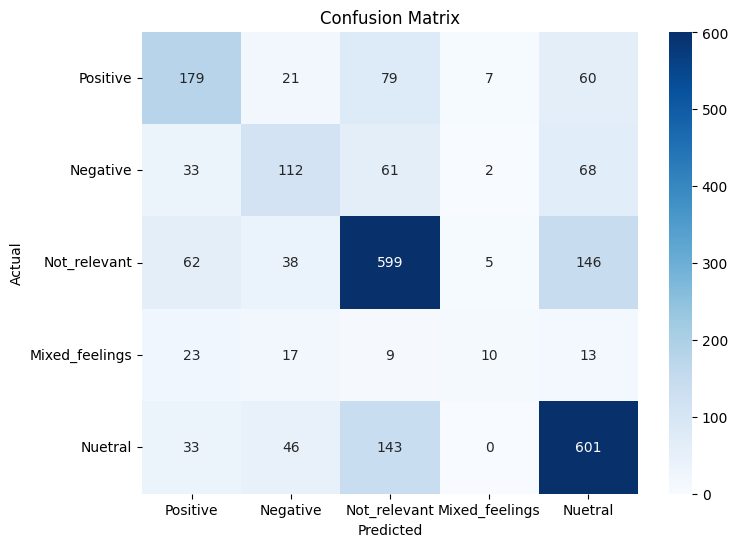

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV
file_path = 'file3.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure 'commentText' column contains strings
data['commentText'] = data['commentText'].astype(str)

# Function to convert sentiment labels to numerical values
sentiment_dict = {
    'Positive': 0,
    'Negative': 1,
    'Not_relevant': 2,
    'Mixed_feelings': 3,
    'Nuetral': 4
}

data['Sentiment_Class'] = data['Sentiment_Class'].map(sentiment_dict)

# Prepare data for SVM
X = data['commentText']
y = data['Sentiment_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize SVM classifier with tuned parameters
svm_classifier = SVC(kernel='linear', C=1.5)  # Tune the 'C' parameter for better performance

# Train the classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on test data
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_dict.keys(), yticklabels=sentiment_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
